In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

df= pd.read_csv('PJME_renewables_weather_emissions.csv')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [3]:
df

,Datetime,PJME_MW,wastage_mw_if_pjme_is_generation,delivered_mw_if_pjme_is_generation,generation_required_mw_if_pjme_is_load,wastage_mw_if_pjme_is_load,solar_mw,wind_mw,temp_c,humidity_pct,...,renewables_mw,net_load_after_renewables_mw,ef_co2e_lb_per_MWh,gross_gen_mwh,co2e_tons_gross_gen,gen_after_renewables_mw,gen_after_renewables_mwh,co2e_tons_after_renewables,co2e_intensity_ton_per_MWh_delivered,co2e_tons_avoided_by_renewables
0,01-01-2007 00:00,28479,1423.95,27055.05,29977.89474,1498.894737,0.0,38.128590,9.367812,62.686816,...,38.128590,28440.87141,599.17,29977.89474,8147.360465,29937.75938,29937.75938,8136.452520,0.286083,10.907945
1,01-01-2007 01:00,26965,1348.25,25616.75,28384.21053,1419.210526,0.0,153.731280,14.862129,65.333586,...,153.731280,26811.26872,599.17,28384.21053,7714.230659,28222.38813,28222.38813,7670.250739,0.286083,43.979920
2,01-01-2007 02:00,25581,1279.05,24301.95,26927.36842,1346.368421,0.0,316.037044,10.612225,70.495743,...,316.037044,25264.96296,599.17,26927.36842,7318.291655,26594.69785,26594.69785,7227.878800,0.286083,90.412856
3,01-01-2007 03:00,24349,1217.45,23131.55,25630.52632,1281.526316,0.0,998.645882,8.789261,65.652778,...,998.645882,23350.35412,599.17,25630.52632,6965.837282,24579.32012,24579.32012,6680.141577,0.286083,285.695705
4,01-01-2007 04:00,23692,1184.60,22507.40,24938.94737,1246.947368,0.0,1418.664277,11.071946,74.048112,...,1418.664277,22273.33572,599.17,24938.94737,6777.880689,23445.61655,23445.61655,6372.024821,0.286083,405.855867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101604,02-08-2018 20:00,44057,2202.85,41854.15,46375.78947,2318.789474,0.0,193.519539,13.882548,73.365935,...,193.519539,43863.48046,599.17,46375.78947,12603.962920,46172.08470,46172.08470,12548.600250,0.286083,55.362669
101605,02-08-2018 21:00,43256,2162.80,41093.20,45532.63158,2276.631579,0.0,264.303881,12.929213,68.714676,...,264.303881,42991.69612,599.17,45532.63158,12374.810360,45254.41697,45254.41697,12299.197490,0.286083,75.612872
101606,02-08-2018 22:00,41552,2077.60,39474.40,43738.94737,2186.947368,0.0,171.982632,12.811349,59.988284,...,171.982632,41380.01737,599.17,43738.94737,11887.324770,43557.91302,43557.91302,11838.123440,0.286083,49.201324
101607,02-08-2018 23:00,38500,1925.00,36575.00,40526.31579,2026.315789,0.0,312.564182,9.864450,73.161965,...,312.564182,38187.43582,599.17,40526.31579,11014.199160,40197.30086,40197.30086,10924.779830,0.286083,89.419329


In [4]:
df.head()

,Datetime,PJME_MW,wastage_mw_if_pjme_is_generation,delivered_mw_if_pjme_is_generation,generation_required_mw_if_pjme_is_load,wastage_mw_if_pjme_is_load,solar_mw,wind_mw,temp_c,humidity_pct,...,renewables_mw,net_load_after_renewables_mw,ef_co2e_lb_per_MWh,gross_gen_mwh,co2e_tons_gross_gen,gen_after_renewables_mw,gen_after_renewables_mwh,co2e_tons_after_renewables,co2e_intensity_ton_per_MWh_delivered,co2e_tons_avoided_by_renewables
0,01-01-2007 00:00,28479,1423.95,27055.05,29977.89474,1498.894737,0.0,38.128590,9.367812,62.686816,...,38.128590,28440.87141,599.17,29977.89474,8147.360465,29937.75938,29937.75938,8136.452520,0.286083,10.907945
1,01-01-2007 01:00,26965,1348.25,25616.75,28384.21053,1419.210526,0.0,153.731280,14.862129,65.333586,...,153.731280,26811.26872,599.17,28384.21053,7714.230659,28222.38813,28222.38813,7670.250739,0.286083,43.979920
2,01-01-2007 02:00,25581,1279.05,24301.95,26927.36842,1346.368421,0.0,316.037044,10.612225,70.495743,...,316.037044,25264.96296,599.17,26927.36842,7318.291655,26594.69785,26594.69785,7227.878800,0.286083,90.412856
3,01-01-2007 03:00,24349,1217.45,23131.55,25630.52632,1281.526316,0.0,998.645882,8.789261,65.652778,...,998.645882,23350.35412,599.17,25630.52632,6965.837282,24579.32012,24579.32012,6680.141577,0.286083,285.695705
4,01-01-2007 04:00,23692,1184.60,22507.40,24938.94737,1246.947368,0.0,1418.664277,11.071946,74.048112,...,1418.664277,22273.33572,599.17,24938.94737,6777.880689,23445.61655,23445.61655,6372.024821,0.286083,405.855867


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101609 entries, 0 to 101608
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Datetime                                101609 non-null  object 
 1   PJME_MW                                 101609 non-null  int64  
 2   wastage_mw_if_pjme_is_generation        101609 non-null  float64
 3   delivered_mw_if_pjme_is_generation      101609 non-null  float64
 4   generation_required_mw_if_pjme_is_load  101609 non-null  float64
 5   wastage_mw_if_pjme_is_load              101609 non-null  float64
 6   solar_mw                                101609 non-null  float64
 7   wind_mw                                 101609 non-null  float64
 8   temp_c                                  101609 non-null  float64
 9   humidity_pct                            101609 non-null  float64
 10  ghi_wm2                                 1016

In [6]:
df.describe()

,PJME_MW,wastage_mw_if_pjme_is_generation,delivered_mw_if_pjme_is_generation,generation_required_mw_if_pjme_is_load,wastage_mw_if_pjme_is_load,solar_mw,wind_mw,temp_c,humidity_pct,ghi_wm2,...,renewables_mw,net_load_after_renewables_mw,ef_co2e_lb_per_MWh,gross_gen_mwh,co2e_tons_gross_gen,gen_after_renewables_mw,gen_after_renewables_mwh,co2e_tons_after_renewables,co2e_intensity_ton_per_MWh_delivered,co2e_tons_avoided_by_renewables
count,101609.000000,101609.000000,101609.000000,101609.000000,101609.000000,101609.000000,101609.000000,101609.000000,101609.000000,101609.000000,...,101609.000000,101609.000000,101609.00,101609.000000,101609.000000,101609.000000,101609.000000,101609.000000,1.016090e+05,101609.000000
mean,32000.905815,1600.045291,30400.860525,33685.164016,1684.258201,322.767293,873.195185,11.604945,72.041943,189.863114,...,1195.962478,30804.943338,599.17,33685.164016,9154.918181,32426.256145,32426.256145,8812.773534,2.860831e-01,342.144647
std,6459.718271,322.985914,6136.732358,6799.703444,339.985172,414.488059,1003.211919,11.309497,9.077543,243.816505,...,1082.516240,6540.077201,0.00,6799.703444,1848.016196,6884.291791,6884.291791,1871.005528,5.551142e-17,309.689596
min,14544.000000,727.200000,13816.800000,15309.473680,765.473684,0.000000,0.000000,-14.155644,34.317747,0.000000,...,0.000000,13656.189470,599.17,15309.473680,4160.792535,14374.936280,14374.936280,3906.804950,2.860831e-01,0.000000
25%,27511.000000,1375.550000,26135.450000,28958.947370,1447.947368,0.000000,123.170196,1.899305,65.531580,0.000000,...,365.528865,26249.224820,599.17,28958.947370,7870.432029,27630.762970,27630.762970,7509.459480,2.860831e-01,104.571629
50%,31262.000000,1563.100000,29698.900000,32907.368420,1645.368421,4.671913,488.422217,11.267128,72.083776,2.748184,...,910.312771,30099.499160,599.17,32907.368420,8943.529719,31683.683330,31683.683330,8610.957881,2.860831e-01,260.425095
75%,35635.000000,1781.750000,33853.250000,37510.526320,1875.526316,630.546543,1254.643020,21.400113,78.593698,370.909731,...,1687.712768,34546.449130,599.17,37510.526320,10194.571090,36364.683290,36364.683290,9883.155091,2.860831e-01,482.826092
max,61646.000000,3082.300000,58563.700000,64890.526320,3244.526316,1604.630360,3800.000000,37.560955,100.000000,943.900212,...,5372.546123,60486.232110,599.17,64890.526320,17635.878480,63669.718010,63669.718010,17304.088490,2.860831e-01,1536.994623


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
# Load the dataset
df= pd.read_csv('PJME_renewables_weather_emissions.csv', parse_dates=["Datetime"])

In [9]:
# Drop rows with missing values
df.dropna(inplace=True)

In [10]:
# Feature selection
features = [
    "solar_mw", "wind_mw", "temp_c", "humidity_pct", "ghi_wm2", "wind_ms","PJME_MW","co2e_tons_gross_gen"
]
targets = [
    "wastage_mw_if_pjme_is_load",
    "generation_required_mw_if_pjme_is_load",
    "gen_after_renewables_mw",       # <- use correct column names here
    "net_load_after_renewables_mw",
    "co2e_tons_after_renewables",
    "co2e_tons_avoided_by_renewables"
]



X = df[features]
y = df[targets]


In [11]:
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) are already defined
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Predictions
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 16.35
RMSE: 39.08
R² Score: 0.9995


In [15]:
# Print accuracy
print("Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Accuracy Metrics:
Mean Absolute Error (MAE): 16.35
Root Mean Squared Error (RMSE): 39.08
R² Score: 0.9995


In [16]:
y_test_safe = y_test.copy()
y_test_safe[y_test_safe == 0] = 1e-6  # Replace zeros to avoid division by zero
relative_error = np.abs((y_pred - y_test) / y_test_safe)
tolerance = 0.10

In [17]:
import numpy as np

# Predict using the trained regression model
y_pred = model.predict(X_test)

# Calculate relative error
relative_error = np.abs((y_pred - y_test) / y_test_safe)

# Calculate "accuracy" as percentage of predictions within tolerance
accuracy = np.mean(relative_error <= tolerance) * 100

print(f"Model Accuracy (within ±{tolerance*100:.0f}% error): {accuracy:.2f}%")


Model Accuracy (within ±10% error): 97.87%


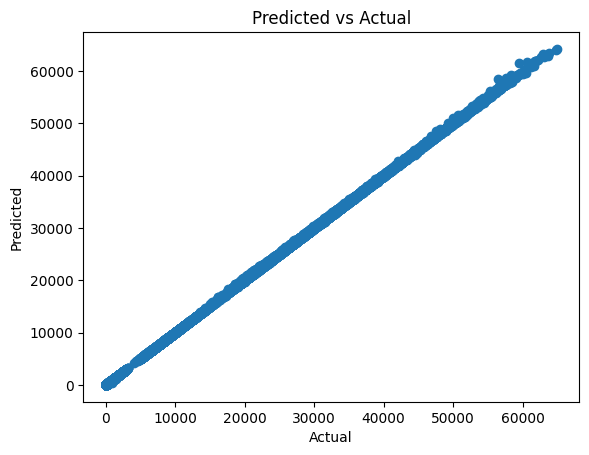

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()


In [19]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Model Accuracy (within ±10% error): 99.32%


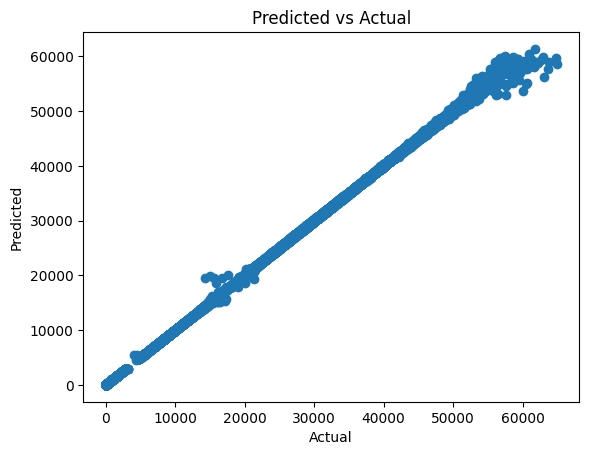

In [20]:
import numpy as np

# Predict using the trained regression model
y_pred = xgb_model.predict(X_test)

# Calculate relative error
relative_error = np.abs((y_pred - y_test) / y_test_safe)

# Calculate "accuracy" as percentage of predictions within tolerance
accuracy = np.mean(relative_error <= tolerance) * 100

print(f"Model Accuracy (within ±{tolerance*100:.0f}% error): {accuracy:.2f}%")


import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()



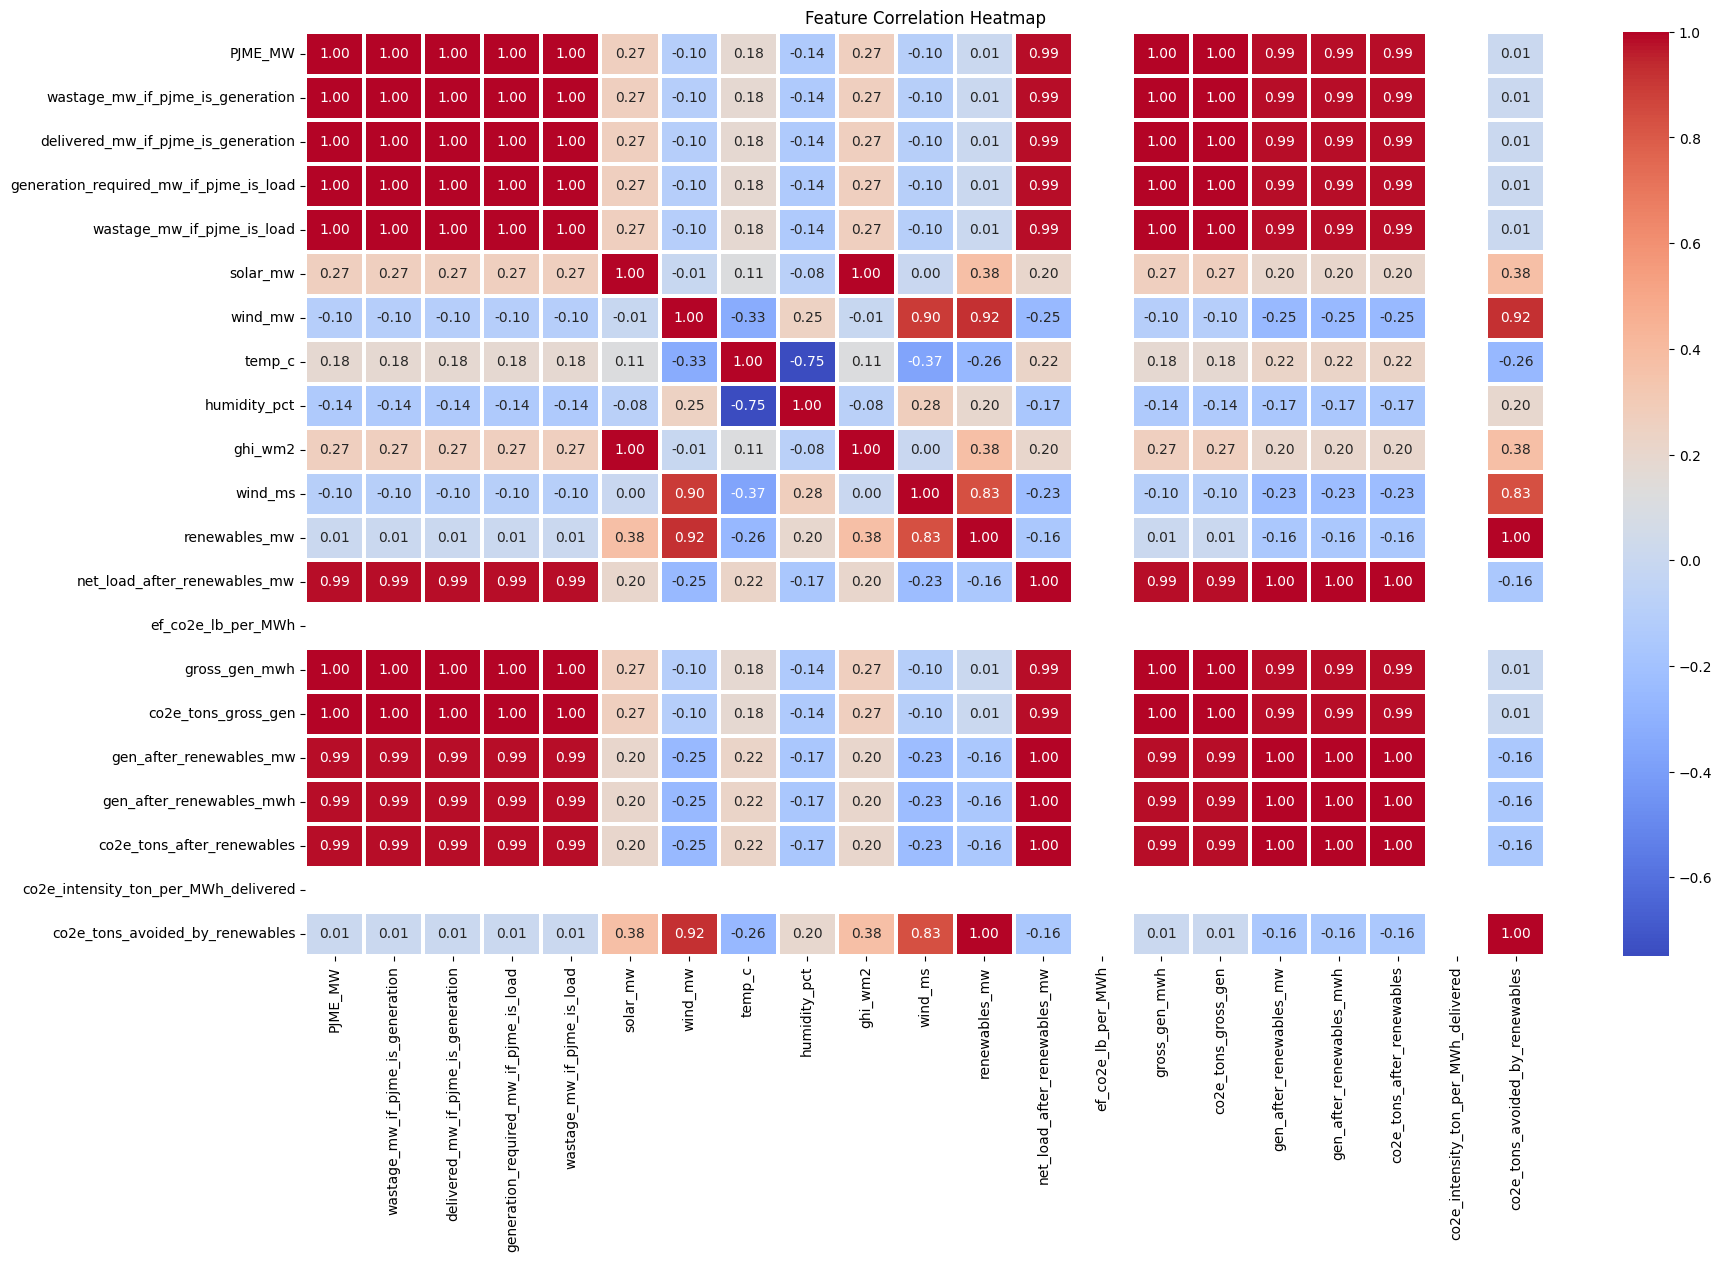

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix on numeric data only
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=1.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [22]:
X_train, y_train, X_test, y_test

(         solar_mw      wind_mw     temp_c  humidity_pct     ghi_wm2  \
 73224    0.000000  3261.494877  -7.502868     89.107072    0.000000   
 45277    0.000000   318.105942  -4.011461     97.996805    0.000000   
 94843   30.738230     0.519103  31.038840     59.718074   18.081312   
 6919   422.965108  2252.898557  24.447862     60.710575  248.803005   
 21590  115.129246  1781.802140   7.085739     81.097723   67.723086   
 ...           ...          ...        ...           ...         ...   
 6265     0.000000   158.568027  19.280125     63.161661    0.000000   
 54886  846.149008    97.696568   3.359483     68.213671  497.734710   
 76820    0.000000     0.000000  24.604632     60.962753    0.000000   
 860      0.000000   860.738568   9.737277     74.795847    0.000000   
 15795    0.000000   679.689571  22.253258     77.474569    0.000000   
 
          wind_ms  PJME_MW  co2e_tons_gross_gen  
 73224  11.553034    22695          6492.655843  
 45277   6.937059    27577        

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
	mae = mean_absolute_error(y_true, y_pred)
	rmse = np.sqrt(mean_squared_error(y_true, y_pred))
	r2 = r2_score(y_true, y_pred)
	print(f"{name} Results:")
	print(f"MAE: {mae:.2f}")
	print(f"RMSE: {rmse:.2f}")
	print(f"R² Score: {r2:.4f}")
	print("-" * 30)

evaluate_model("Random Forest", y_test, model.predict(X_test))
evaluate_model("XGBoost", y_test, xgb_model.predict(X_test))

Random Forest Results:
MAE: 16.35
RMSE: 39.08
R² Score: 0.9995
------------------------------
XGBoost Results:
MAE: 32.77
RMSE: 107.32
R² Score: 0.9996
------------------------------


In [24]:
# User Input Prediction Function

import pandas as pd
import numpy as np

def predict_from_user_input(model):
    print("Enter weather features for prediction:")
    
    temp_c = float(input("Temperature (°C): "))
    humidity_pct = float(input("Humidity (%): "))
    ghi_wm2 = float(input("Global Horizontal Irradiance (W/m²): "))
    wind_ms = float(input("Wind Speed (m/s): "))

    # Create DataFrame for prediction
    user_data = pd.DataFrame([{
        "temp_c": temp_c,
        "humidity_pct": humidity_pct,
        "ghi_wm2": ghi_wm2,
        "wind_ms": wind_ms
    }])
    
    # Predict using trained model
    prediction = model.predict(user_data)[0]
    
    # Print results
    print("\n--- Predicted Outputs ---")
    for col_name, value in zip(y.columns, prediction):
        print(f"{col_name}: {value:.2f}")


In [25]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Base model with parallelism enabled - works fine on Windows
base_model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

# MultiOutputRegressor without n_jobs argument
multi_model = MultiOutputRegressor(base_model)

# Train model
multi_model.fit(X_train, y_train)


# Define your user input prediction function
def predict_from_user_input(model):
    print("Enter input features for prediction:")

    solar_mw = float(input("Solar Power (MW): "))
    wind_mw = float(input("Wind Power (MW): "))
    temp_c = float(input("Temperature (°C): "))
    humidity_pct = float(input("Humidity (%): "))
    ghi_wm2 = float(input("GHI (W/m²): "))
    wind_ms = float(input("Wind Speed (m/s): "))
    pjme_mw = float(input("Total PJME Load (MW): "))
    co2e_tons_gross_gen = float(input("Gross CO2e Emissions (tons): "))

    user_data = pd.DataFrame([{
        "solar_mw": solar_mw,
        "wind_mw": wind_mw,
        "temp_c": temp_c,
        "humidity_pct": humidity_pct,
        "ghi_wm2": ghi_wm2,
        "wind_ms": wind_ms,
        "PJME_MW": pjme_mw,
        "co2e_tons_gross_gen": co2e_tons_gross_gen
    }])

    prediction = model.predict(user_data)[0]

    print("\n--- Predicted Outputs ---")
    for col_name, value in zip(y.columns, prediction):
        print(f"{col_name}: {value:.2f}")

# Call the function with your trained model
predict_from_user_input(multi_model)


Enter input features for prediction:

--- Predicted Outputs ---
wastage_mw_if_pjme_is_load: 794.95
generation_required_mw_if_pjme_is_load: 15995.35
gen_after_renewables_mw: 16060.65
net_load_after_renewables_mw: 14903.10
co2e_tons_after_renewables: 4300.74
co2e_tons_avoided_by_renewables: 2.28


In [26]:
from sklearn.preprocessing import StandardScaler
import joblib

# Example: create and fit scaler on training data
scaler = StandardScaler()
scaler.fit(X_train)

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

print("Scaler saved successfully.")


Scaler saved successfully.


In [27]:
# Load scaler from file
scaler = joblib.load('scaler.pkl')

print("Scaler loaded successfully.")

Scaler loaded successfully.


In [28]:
# Save the model to a joblib file

joblib.dump(multi_model, 'All_in_One_Forcaster_Model.pkl')

print("Model saved successfully.")

Model saved successfully.
